In [26]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
# загрузка датасета
hr = pd.read_csv('HR.csv', encoding = 'UTF-8')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# проверяем типы данных и пустые значения
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# рассчитываем базовые статистики, кроме моды, для числовых значений
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# считаем моду
print((hr['satisfaction_level'].mode()))
print((hr['last_evaluation'].mode()))
print((hr['number_project'].mode()))
print((hr['average_montly_hours'].mode()))
print((hr['time_spend_company'].mode()))
print((hr['Work_accident'].mode()))
print((hr['left'].mode()))
print((hr['promotion_last_5years'].mode()))
print((hr['department'].mode()))
print((hr['salary'].mode()))

0    0.1
Name: satisfaction_level, dtype: float64
0    0.55
Name: last_evaluation, dtype: float64
0    4
Name: number_project, dtype: int64
0    135
1    156
Name: average_montly_hours, dtype: int64
0    3
Name: time_spend_company, dtype: int64
0    0
Name: Work_accident, dtype: int64
0    0
Name: left, dtype: int64
0    0
Name: promotion_last_5years, dtype: int64
0    sales
Name: department, dtype: object
0    low
Name: salary, dtype: object


In [7]:
# матрица корреляции
corr = hr.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-7-93edad9579b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hr.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000




---



*   Самыми скоррелированными переменными стали number_project (кол-во проект за всё рабочее время) и average_montly_hours (среднее кол-во часов на раб.месте в месяц)

*   Наименее скореллированными переменными стали time_spend_company (Стаж работы в компании в годах) и Work_accident (несчастные случаи за всё время)


---



In [8]:
# кол-во сотрудников по каждому отделу
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по уровню зарплаты')

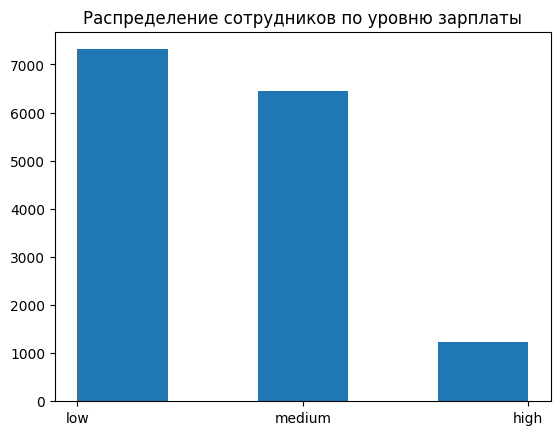

In [9]:
plt.hist(hr['salary'], bins = 5)
plt.title('Распределение сотрудников по уровню зарплаты')

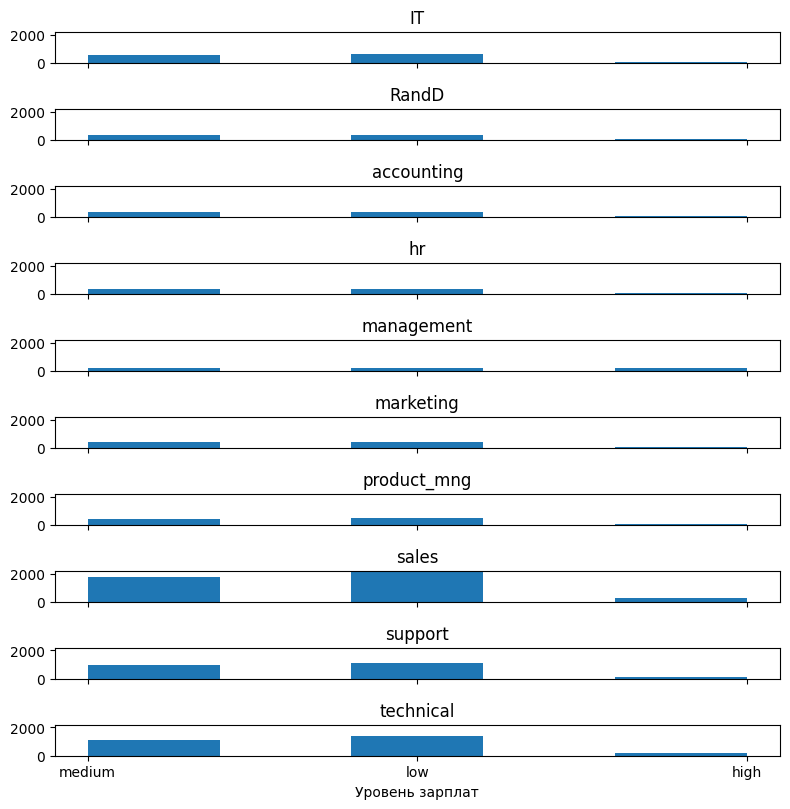

In [10]:
# Создание подграфиков для каждого отдела
fig, axs = plt.subplots(len(hr['department'].unique()), figsize=(8, 8), sharex=True, sharey=True)

# Итерация по уникальным значениям отделов
for i, department in enumerate(sorted(hr['department'].unique())):
    # Получение данных по конкретному отделу
    salary_values = hr[hr['department'] == department]['salary']

    # Визуализация гистограммы
    axs[i].hist(salary_values, bins=5)
    axs[i].set_title(department)

# Размещение подграфиков
plt.tight_layout()

# Отображение графика
plt.xlabel('Уровень зарплат')
plt.show()

Гипотезы

In [11]:
# H0 — cотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом
# H1 — cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

# формируем выборки
hr_high = hr[hr['salary'] == 'high']['average_montly_hours']
hr_low = hr[hr['salary'] == 'low']['average_montly_hours']

In [12]:
# Выполняем тест Фишера для проверки равенства дисперсий
statistic, p_value = f_oneway(hr_high, hr_low)
print(f'Статистика = {statistic:.5f}, p = {p_value:.5f}')

if p_value < 0.05:
    print("Разница между дисперсиями является статистически значимой.")
else:
    print("Разница между дисперсиями не является статистически значимой.")

Статистика = 0.53125, p = 0.46610
Разница между дисперсиями не является статистически значимой.


In [13]:
stat, p_value = stats.ttest_ind(hr_high, hr_low)

# Отображение результатов t-теста
print(f'Статистика = {stat:.5f}, p = {p_value:.5f}')

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу. Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Принимаем нулевую гипотезу. Сотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом')

Статистика = -0.72887, p = 0.46610
Принимаем нулевую гипотезу. Сотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом


In [14]:
left = hr[hr['left'] == 1]  # Уволившиеся
# Доля сотрудников с повышением за последние 5 лет
promotion_left = (len(left[left['promotion_last_5years'] == 1])) / (len(left))
print(f'Доля сотрудников с повышением среди уволившихся: {promotion_left:.2f}')
# Средняя степень удовлетворенности
satisfaction_left = left['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди уволившихся: {satisfaction_left:.2f}')
# Среднее количество проектов
projects_left = left['number_project'].mean()
print(f'Среднее количество проектов среди уволившихся: {projects_left:.2f}')

Доля сотрудников с повышением среди уволившихся: 0.01
Средняя степень удовлетворенности среди уволившихся: 0.44
Среднее количество проектов среди уволившихся: 3.86


In [15]:
not_left = hr[hr['left'] == 0]  # Неуволившиеся
# Доля сотрудников с повышением за последние 5 лет
promotion_not_left = (len(not_left[not_left['promotion_last_5years'] == 1])) / (len(not_left))
print(f'Доля сотрудников с повышением среди неуволившихся: {promotion_not_left:.2f}')
# Средняя степень удовлетворенности
satisfaction_not_left = not_left['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди неуволившихся: {satisfaction_not_left:.2f}')
# Среднее количество проектов
projects_not_left = not_left['number_project'].mean()
print(f'Среднее количество проектов среди неуволившихся: {projects_not_left:.2f}')

Доля сотрудников с повышением среди неуволившихся: 0.03
Средняя степень удовлетворенности среди неуволившихся: 0.67
Среднее количество проектов среди неуволившихся: 3.79


In [21]:
# определяем входные данные без department и salary
df_hr = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
# определяем метки для определения "Уволится или не уволится"
left_df_hr = df_hr['left']

# разделяем на две выборки
X_train, X_test, y_train, y_test = train_test_split(df_hr, left_df_hr, test_size=0.2)

In [23]:
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# делаем прогноз на тестовой выборке
lda.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
2571,0.0,0.0
1712,1.0,0.0
5225,0.0,NaN
12708,1.0,NaN
12669,1.0,NaN
...,...,...
4666,0.0,NaN
1474,1.0,0.0
5832,0.0,NaN
11969,0.0,NaN


In [27]:
accuracy_score(y_test, lda.predict(X_test))
# LDA правильно предсказала увольнение сотрудников на 76.1%

0.761